# 实验四：朴素贝叶斯分类器
- 姓名：姜志凯
- 学号：2011937
- 专业：信息安全

### 实验要求

**截止日期：11月18日**
- 作业的提交格式参考之前的说明，提交到2120220594@nankai.edu.cn

### 基本要求
- 采用分层采样的方式将数据集划分为训练集和测试集。
- 给定编写一个朴素贝叶斯分类器，对测试集进行预测，计算分类准确率。

### 中级要求
- 使用测试集评估模型，得到混淆矩阵，精度，召回率，F值。

### 高级要求
- 在中级要求的基础上画出三类数据的ROC曲线，并求出AUC值。

### 导入需要的包

In [36]:
import math
import numpy as np  
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

### 导入数据集 wine.data

In [16]:
f = open('wine.data','r')
types = [[],[],[]]                      #按类分的所有数据
test_data = [[],[],[]]
train_data = [[],[],[]]
data_num = 0                            #数据总数
test_len = []                           #测试集里每一类的个数
means = [[],[],[]]                      #每一类的均值
std = [[],[],[]]                        #每一类的标准差
myline = '1'
while myline:
    myline = f.readline().split(',')
    if len(myline) != 14:
        break
    for t in range(len(myline)):
        if t == 0:
            #标签
            myline[t] = int(myline[t])
        else:
            myline[t] = float(myline[t])
    #去掉标签
    temp = myline.pop(0)
    types[temp - 1].append(myline)

data_num = sum([len(types[i]) for i in range(3)])
#数据总量
print(data_num)
#各类别数据量
print(len(types[0]),len(types[1]),len(types[2]))
print(types[0][0])

178
59 71 48
[14.23, 1.71, 2.43, 15.6, 127.0, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065.0]


### 划分数据集

In [17]:
#分层采样将数据集按4:1划分为训练集和测试集
train_data=[[],[],[]]
test_data=[[],[],[]]
for i in range(3):
    for j in range(len(types[i])):
        if(j%5==0):
            test_data[i].append(types[i][j])
        else:
            train_data[i].append(types[i][j])
#print(train_data[1])
#print(test_data[1])

### 朴素贝叶斯分类器

In [26]:
def Gaussian(data, std, means):
    #dim为条件个数
    dim = len(data)
    temp = 1
    temp1 = [(2 * math.pi) ** 0.5 * std[c] for c in range(dim)]
    temp2 = [-1 * (data[c] - means[c]) ** 2 for c in range(dim)]
    temp3 = [temp2[c] / (2 * (std[c]**2)) for c in range(dim)]
    temp4 = [(math.e**temp3[c]) / temp1[c] for c in range(dim)]
    for k in range(dim):
        temp = temp * temp4[k]
    return temp

def bayes_classificate(train_data, test_data):
    #每个类的训练集样本个数
    train_num = [len(train_data[i]) for i in range(3)]
    #条件个数
    dim = len(train_data[0][0]) 
    
    #计算每个类的均值
    for i in range(3):
        means_temp = [0]*dim
        for j in range(train_num[i]):
            for k in range(dim):
                means_temp[k] += train_data[i][j][k]
        for j in range(dim):
            means_temp[j] = means_temp[j] / train_num[i]
        means[i] = means_temp
    
    #计算每一类的标准差                         
    for i in range(3):
        std_temp = [0]*dim
        for j in range(train_num[i]):
            for k in range(dim):
                std_temp[k] += (train_data[i][j][k] - means[i][k])**2
        for j in range(dim):
            std_temp[j] = (std_temp[j] / train_num[i])**0.5
        std[i] = std_temp
    
    wrong_num = 0
    for i in range(3):
        for t in test_data[i]:                  #两层循环：从每一类取每一个测试样本
            my_type = []
            for j in range(3):
                #由于数据集中所有的属性都是连续值，连续值的似然估计可以按照高斯分布来计算：
                p = Gaussian(t, std[j], means[j])
                my_type.append(p)                        
            pre_type = my_type.index(max(my_type))          #取分值最大的为预测类别
            print("预测结果：",pre_type)
            if pre_type != i:                               #统计错误数
                wrong_num+=1
    total_num = sum([len(test_data[i]) for i in range(3)])
    print("测试样例数量：",total_num,"；错误分类数：",wrong_num,"；分类准确率：",1 - wrong_num / total_num)
    return wrong_num

In [27]:
bayes_classificate(train_data, test_data)

预测结果： 0
预测结果： 0
预测结果： 0
预测结果： 0
预测结果： 0
预测结果： 1
预测结果： 0
预测结果： 0
预测结果： 0
预测结果： 0
预测结果： 0
预测结果： 0
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 1
预测结果： 2
预测结果： 2
预测结果： 2
预测结果： 2
预测结果： 2
预测结果： 2
预测结果： 2
预测结果： 2
预测结果： 2
预测结果： 2
测试样例数量： 37 ；错误分类数： 1 ；分类准确率： 0.972972972972973


1

### 混淆矩阵

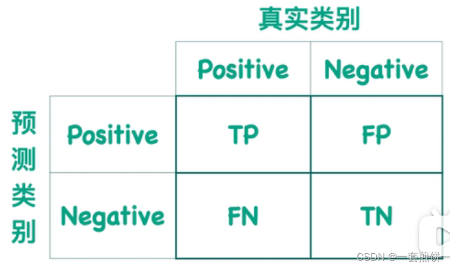

In [28]:
#混淆矩阵统计
def Confusion_matrix(train_data, test_data):
    #每个类的样本个数
    train_num = [len(train_data[i]) for i in range(3)] 
    #条件个数
    dim = len(train_data[0][0]) 
    
    #每一类的均值
    means = [[],[],[]] 
    for i in range(3):
        means_temp = [0]*dim
        for j in range(train_num[i]):
            for k in range(dim):
                means_temp[k] += train_data[i][j][k]
        for j in range(dim):
            means_temp[j] = means_temp[j] / train_num[i]
        means[i] = means_temp
    
    #每一类的标准差
    std = [[],[],[]]                           
    for i in range(3):
        std_temp = [0]*dim
        for j in range(train_num[i]):
            for k in range(dim):
                std_temp[k] += (train_data[i][j][k] - means[i][k])**2
        for j in range(dim):
            std_temp[j] = (std_temp[j] / train_num[i])**0.5
        std[i] = std_temp
    
    con_mat = np.zeros((3,3))
    #        实际0  实际1  实际2
    #预测0    ...    ...    ...  
    #预测1    ...    ...    ...
    #预测2    ...    ...    ...
    for i in range(3):
        for t in test_data[i]:
            my_type = []
            for j in range(3):
                p = Gaussian(t, std[j], means[j])
                my_type.append(p)                        
            pre_type = my_type.index(max(my_type))
            con_mat[pre_type][i] = con_mat[pre_type][i] + 1
    return con_mat

In [31]:
#打印混淆矩阵
con_mat=Confusion_matrix(train_data, test_data)
print(con_mat)

[[11.  0.  0.]
 [ 1. 15.  0.]
 [ 0.  0. 10.]]


### 精度、召回率、F值

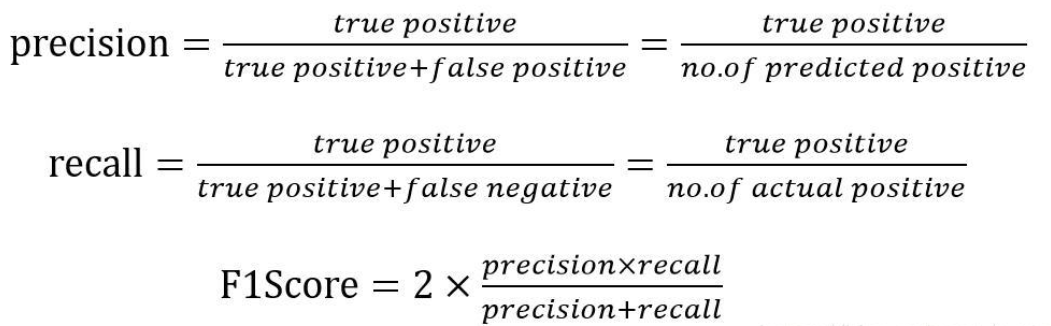

In [32]:
#精度
def precision(Confusion_matrix):
    dim = Confusion_matrix.shape[0]
    res = [0]*dim
    s = np.sum(Confusion_matrix,axis = 1)
    for i in range(dim):
        res[i] = Confusion_matrix[i][i] / s[i]
    return res

#召回率
def recall(con_matrix):
    dim = con_matrix.shape[0]
    res = [0]*dim
    s = np.sum(con_matrix,axis = 0)
    for i in range(dim):
        res[i] = con_matrix[i][i] / s[i]
    return res

#F值
def F1_Score(p,r):
    dim = len(p)
    F = [2 / ( 1 / p[i] + 1 / r[i]) for i in range(dim)]
    return F

In [33]:
p=precision(con_mat)
r=recall(con_mat)
f=F1_Score(p,r)
print(p)
print(r)
print(f)

[1.0, 0.9375, 1.0]
[0.9166666666666666, 1.0, 1.0]
[0.9565217391304348, 0.9677419354838711, 1.0]


### ROC曲线

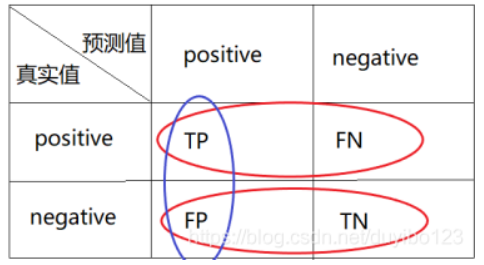

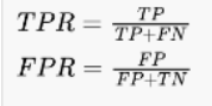

- ROC曲线就是描述TPR和FPR之间的关系的曲线，通过不断改变分类阈值，不断对测试集进行分类，不断得到TPR、FPR值，然后画出曲线。

In [37]:
def ROC(train_data, test_data):
    #每个类的样本个数
    train_num = [len(train_data[i]) for i in range(3)] 
    #条件个数
    dim = len(train_data[0][0]) 
    
    #每一类的均值
    means = [[],[],[]] 
    for i in range(3):
        means_temp = [0]*dim
        for j in range(train_num[i]):
            for k in range(dim):
                means_temp[k] += train_data[i][j][k]
        for j in range(dim):
            means_temp[j] = means_temp[j] / train_num[i]
        means[i] = means_temp
    
    #每一类的标准差
    std = [[],[],[]]                           
    for i in range(3):
        std_temp = [0]*dim
        for j in range(train_num[i]):
            for k in range(dim):
                std_temp[k] += (train_data[i][j][k] - means[i][k])**2
        for j in range(dim):
            std_temp[j] = (std_temp[j] / train_num[i])**0.5
        std[i] = std_temp
    
    my_pred = []
    for i in range(3):
        for t in test_data[i]:
            my_type = []
            for j in range(3):
                p = Gaussian(t, std[j], means[j])
                my_type.append(p)                        
            my_type.append(i) #mytype[p1,p2,p3,class]
            my_pred.append(my_type)
    
    res = [[],[],[]]
    total_num = len(my_pred)
    for i in range(3):
        TPFN = len(test_data[i])
        TNFP = total_num - len(test_data[i])
        my_pred.sort(reverse=True, key=lambda my_pred: my_pred[i]) 
        tempid = 0
        for j in range(len(my_pred)): #j:阈值
            if my_pred[j][3] == i:
                tempid += j
            TP = 0
            FP = 0
            for k in range(len(my_pred)): #k:样例数
                if j < k: #被认为不成立
                    continue;
                else:    #被认为成立
                    if my_pred[k][3] == i:
                        TP = TP + 1
                    else:
                        FP = FP + 1
            res[i].append([TP/TPFN, FP/TNFP])
    return res

In [39]:
res=ROC(train_data,test_data)

c1_fpr = []
for i in range(len(res[0])):
    c1_fpr.append(res[0][i][1])
c1_tpr = []
for i in range(len(res[0])):
    c1_tpr.append(res[0][i][0])
c2_fpr = []
for i in range(len(res[0])):
    c2_fpr.append(res[1][i][1])
c2_tpr = []
for i in range(len(res[0])):
    c2_tpr.append(res[1][i][0])
c3_fpr = []
for i in range(len(res[0])):
    c3_fpr.append(res[2][i][1])
c3_tpr =[]
for i in range(len(res[0])):
    c3_tpr.append(res[2][i][0])

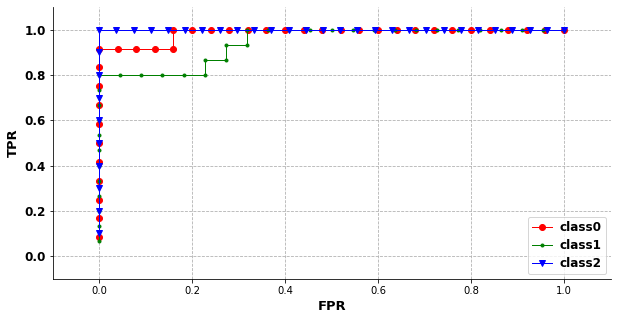

In [41]:
#绘图
plt.figure(figsize=(10, 5))
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.plot(c1_fpr, c1_tpr, marker='o', color="red", label="class0", linewidth=1.0)
plt.plot(c2_fpr, c2_tpr, marker='.', color="green", label="class1", linewidth=1.0)
plt.plot(c3_fpr, c3_tpr, marker='v', color="blue", label="class2", linewidth=1.0)
plt.yticks(fontsize=12, fontweight='bold')
plt.xlabel("FPR", fontsize=13, fontweight='bold')
plt.ylabel("TPR", fontsize=13, fontweight='bold')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
ltext = leg.get_texts()
plt.setp(ltext, fontsize=12, fontweight='bold')

plt.show()

### 计算AUC值

- AUC值就是ROC曲线下的面积

In [42]:
AUC1 = 0
AUC2 = 0
AUC3 = 0

for i in range(len(c1_tpr) - 1):
    AUC1 += (c1_tpr[i] * (c1_fpr[i + 1] - c1_fpr[i]))
for i in range(len(c2_tpr) - 1):
    AUC2 += (c2_tpr[i] * (c2_fpr[i + 1] - c2_fpr[i]))
for i in range(len(c3_tpr) - 1):
    AUC3 += (c3_tpr[i] * (c3_fpr[i + 1] - c3_fpr[i]))
    
print(AUC1)
print(AUC2)
print(AUC3)

0.9866666666666667
0.9454545454545454
1.0
